In [1]:
import pandas
import numpy as np
from profanity_check import predict, predict_prob

In [6]:
# sample text for profanity check methods
print(predict(['predict() takes an array and returns a 1 for each string if it is offensive, else 0.']))
print(predict(['what the fuck are you doing?']))
print(predict_prob(['predict() takes an array and returns a 1 for each string if it is offensive, else 0.']))
print(predict_prob(['what the fuck are you doing?']))

[0]
[1]
[0.0324696]
[0.9999997]


In [12]:
# loading in the testing dataset of explicit tracks
test_set_exp = pandas.read_csv('explicit_wr.csv', header = 0, names = ['ID', 'artist', 'song', 'text', 'explicit_label', 'explicit_est', 'explicit_prob', 'accuracy'])
print(test_set_exp)

         ID          artist                                           song  \
0     27522     Chris Brown                                     D.G.I.F.U.   
1     11568       Lil Wayne                                    High Beamin   
2     43066  Marilyn Manson                             Unkillable Monster   
3     36420        Ice Cube                             It's A Man's World   
4     24237   Ariana Grande                              Thinking Bout You   
...     ...             ...                                            ...   
1024  34751       Green Day                          Platypus (I Hate You)   
1025  43011  Marilyn Manson  May Cause Discoloration Of The Urine Or Feces   
1026  16126         Pitbull                                         Mr 305   
1027  48685            P!nk                                      True Love   
1028   5752        Fabolous                                     Makin Love   

                                                   text  explic

In [13]:
# computing values for each song in the dataset
for index, row in test_set_exp.iterrows():
  test_set_exp.at[index, 'explicit_prob'] = predict_prob([row['text']])
  test_set_exp.at[index, 'explicit_est'] = predict([row['text']])

In [14]:
# loading testing dataset of clean songs
test_set_cln = pandas.read_csv('inexplicit_wr.csv', header = 0, names = ['ID', 'artist', 'song', 'text', 'explicit_label', 'explicit_est', 'explicit_prob', 'accuracy'])
print(test_set_cln)

         ID         artist                           song  \
0     38729    Josh Groban                        Weeping   
1     13475   Natalie Cole       I've Got Love On My Mind   
2      8418   Indigo Girls  Bury My Heart At Wounded Knee   
3     25786      Bob Dylan         Changing Of The Guards   
4     46630   Oingo Boingo                  Whole Day Off   
...     ...            ...                            ...   
3034  37885  Jimmy Buffett                 Domino College   
3035  56906         Xscape                  Am I Dreamin'   
3036  30104       Don Moen                 Thank You Lord   
3037  41927      LL Cool J            Hollis To Hollywood   
3038  30737     Ed Sheeran                    Alfire Love   

                                                   text  explicit_label  \
0     (Feat. Ladysmith Black Mambazo)      I knew a ...           False   
1     I've got love on my mind   I've got love on my...           False   
2     Indian legislation's on the desk of 

In [15]:
for index, row in test_set_cln.iterrows():
  test_set_cln.at[index, 'explicit_prob'] = predict_prob([row['text']])
  test_set_cln.at[index, 'explicit_est'] = predict([row['text']])

In [17]:
# determining accuracy
# iterate through both datasets and compare the actual results with Spotify's
# original explicit labels

for index, row in test_set_exp.iterrows():
  if test_set_exp.at[index, 'explicit_est'] == 0:
    test_set_exp.at[index, 'accuracy'] = 0
  else:
    test_set_exp.at[index, 'accuracy'] = 1

for index, row in test_set_cln.iterrows():
  if test_set_cln.at[index, 'explicit_est'] == 1:
    test_set_cln.at[index, 'accuracy'] = 0
  else:
    test_set_cln.at[index, 'accuracy'] = 1

In [18]:
# saving the results
test_set_exp.to_csv('explicit_modified.csv')
test_set_cln.to_csv('inexplicit_modified.csv')

In [92]:
# producing a overall and subscores for the algorithm's accuracy
accuracy_explicit = (test_set_exp['accuracy'].mean())
accuracy_clean = (test_set_cln['accuracy'].mean())
combined_accuracy = test_set_exp['accuracy']
combined_accuracy = combined_accuracy.append(test_set_cln['accuracy'])
overall_accuracy = combined_accuracy.mean()
print("Accuracy of algorithm on tracks labelled 'explicit' by Spotify: ", accuracy_explicit)
print("Accuracy of algorithm on tracks not labelled 'explicit' by Spotify: ", accuracy_clean)
print("Accuracy of algorithm on all tracks: " , overall_accuracy)

explicit_average = test_set_exp['explicit_prob'].mean()
inexplicit_average = test_set_cln['explicit_prob'].mean()
combined_average = test_set_exp['explicit_prob']
combined_average = combined_average.append(test_set_cln['explicit_prob'])
overall_average = combined_average.mean()
print("\nAverage score of  all explicit tracks: ", explicit_average)
print("Average score of all clean tracks: ", inexplicit_average)
print("Average score of all tracks: ", overall_average)

Accuracy of algorithm on tracks labelled 'explicit' by Spotify:  0.7123420796890184
Accuracy of algorithm on tracks not labelled 'explicit' by Spotify:  0.9108259295820994
Accuracy of algorithm on all tracks:  0.8606194690265486

Average score of  all explicit tracks:  0.7168655150346815
Average score of all clean tracks:  0.18263257700304011
Average score of all tracks:  0.31776671988272764


In [30]:
# collecting a list of mis-matched songs (for further analysis)
exp_inaccurate = test_set_exp.loc[test_set_exp['accuracy'] == 0]
cln_inaccurate = test_set_cln.loc[test_set_cln['accuracy'] == 0]
print(exp_inaccurate) # 295 inaccuracies
print(cln_inaccurate) # 271 inaccuracies

         ID              artist  \
4     24237       Ariana Grande   
6     16167                P!nk   
11    40840                Korn   
13    30466               Drake   
18     8573  Insane Clown Posse   
...     ...                 ...   
1017  14590               Oasis   
1021  39292          Kanye West   
1025  43011      Marilyn Manson   
1026  16126             Pitbull   
1027  48685                P!nk   

                                               song  \
4                                 Thinking Bout You   
6                                 Are We All We Are   
11                         Wish I Wasn't Born Today   
13                                        Fireworks   
18                      Intro ( The Great Milenko )   
...                                             ...   
1017                          Married With Children   
1021                                       I Wonder   
1025  May Cause Discoloration Of The Urine Or Feces   
1026                         

In [32]:
exp_inaccurate.to_csv("explicit_inaccuracies.csv")
cln_inaccurate.to_csv("clean_inaccuracies.csv")

In [93]:
# Below is a calculation of the average ratings of different subgroupings of tracks,
# including combined tracks, matching labels, and mismatched labels.
# Looking at the average scores of the mismatched songs,
# we see almost a reverse of the accurate scores

test_set_exp_accurate = test_set_exp.loc[test_set_exp['accuracy'] == 1]
test_set_cln_accurate = test_set_cln.loc[test_set_cln['accuracy'] == 1]

avg_prob_exp_acc = test_set_exp_accurate['explicit_prob'].mean()
df_inaccurate_avg_prob = exp_inaccurate['explicit_prob'].mean()
df2_inaccurate_avg_prob = cln_inaccurate['explicit_prob'].mean()

print('Average score of accurate explicit songs: ', avg_prob_exp_acc)
print('Average score of explicit inaccuracies: ', df_inaccurate_avg_prob)
print('Average score of all explicit songs: ', explicit_average)
print('Percentage of correctly-predicted explicit songs: ', test_set_exp['accuracy'].mean())


avg_prob_inexp_acc = test_set_cln_accurate['explicit_prob'].mean()
print('\nAverage score of accurate clean songs: ', avg_prob_inexp_acc)
print('Average score of clean inaccuracies: ', df2_inaccurate_avg_prob)
print('Average score of all clean songs: ', inexplicit_average)
print('Percentage of correctly-predicted clean songs: ', test_set_cln['accuracy'].mean())

print("\nAverage score of all tracks: ", overall_average)
print("Accuracy of algorithm on all tracks: " , overall_accuracy)

Average score of accurate explicit songs:  0.9039712068497988
Average score of explicit inaccuracies:  0.25352608226278567
Average score of all explicit songs:  0.7168655150346815
Percentage of correctly-predicted explicit songs:  0.7123420796890184

Average score of accurate clean songs:  0.13004492182594143
Average score of clean inaccuracies:  0.7197640512842561
Average score of all clean songs:  0.18263257700304011
Percentage of correctly-predicted clean songs:  0.9108259295820994

Average score of all tracks:  0.31776671988272764
Accuracy of algorithm on all tracks:  0.8606194690265486


<AxesSubplot:title={'center':'Frequency of scores for explicit tracks'}, ylabel='Frequency'>

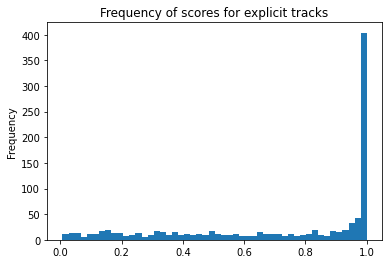

In [73]:
column = test_set_exp['explicit_prob']
column.plot.hist(bins = 50, title = 'Frequency of scores for explicit tracks') #distribution of explicit songs

<AxesSubplot:title={'center':'Frequency of scores for clean tracks'}, ylabel='Frequency'>

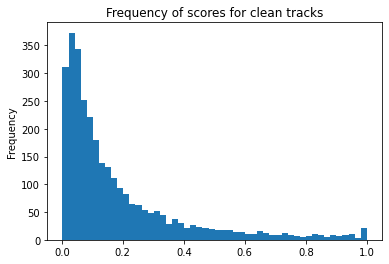

In [74]:
column2 = test_set_cln['explicit_prob']
column2.plot.hist(bins = 50, title = 'Frequency of scores for clean tracks') #distribution of inexplicit songs

In [50]:
# Now it is time to analyze a larger dataset using this toolkit

In [52]:
mega_df = pandas.read_csv('spotify_songs.csv', header = 0)
mega_df["explicit_prob"] = np.nan
mega_df["explicit_est"] = np.nan
mega_df = mega_df.loc[mega_df["language"] == "en"] # filter out all non-english songs
print(mega_df)

                     track_id  \
1      004s3t0ONYlzxII9PLgU6z   
2      00chLpzhgVjxs1zKC9UScL   
3      00cqd6ZsSkLZqGMlQCR0Zo   
4      00emjlCv9azBN0fzuuyLqy   
5      00f9VGHfQhAHMCQ2bSjg3D   
...                       ...   
18448  7zxRMhXxJMQCeDDg0rKAVo   
18449  7zXzWCVuz7whIuYZyEAlxt   
18450  7zycSpvjDcqh6YT1FEl2kY   
18451  7zye9v6B785eFWEFYs13C2   
18452  7zyLObYw4QUKQDyZOb4J0Y   

                                              track_name  \
1                                           I Feel Alive   
2                                                 Poison   
3      Baby It's Cold Outside (feat. Christina Aguilera)   
4                                             Dumb Litty   
5                                                Soldier   
...                                                  ...   
18448                                           Some Way   
18449                    Rising Like The Sun - Radio Mix   
18450                                           Anaconda   
184

In [53]:
# caclulating the score and label for each song in the ~15k song dataset
for index, row in mega_df.iterrows():
  mega_df.at[index, 'explicit_prob'] = predict_prob([row['lyrics']])
  mega_df.at[index, 'explicit_est'] = predict([row['lyrics']])
mega_df.to_csv("spotify_songs_modified.csv")

In [66]:
mega_avg_prob = mega_df["explicit_prob"].mean()
print("Average explicitness score of all songs: ", mega_avg_prob)
exp_avg_prob = mega_df.loc[mega_df["explicit_est"] == 1]["explicit_prob"].mean()
print("Average score of explicit songs: ", exp_avg_prob)
inexp_avg_prob = mega_df.loc[mega_df["explicit_est"] == 0]["explicit_prob"].mean()
print("Average score of clean songs: ", inexp_avg_prob)
pctg_explicit = mega_df["explicit_est"].mean()
print("Percentage of songs labeled explicit: ", pctg_explicit)

Average explicitness score of all songs:  0.3460731331102976
Average score of explicit songs:  0.8562476255150907
Average score of clean songs:  0.16147764182557128
Percentage of songs labeled explicit:  0.26569295683219735


In [ ]:
# Now to run an analysi of the results, grouping by genre and subgenre

In [55]:
# genre analysis
# initializing lists to create a dataframe out of
genres_avg_score = []
genres_pctg_exp = []
genres_avg_score_exp = []
genres_avg_score_inexp = []
genres = mega_df["playlist_genre"].unique().tolist()
genres.sort()
# iterate through each genre in the dataset and
# average the scores of all songs in each genre
for genre in genres:
  genres_avg_score.append(mega_df.loc[mega_df["playlist_genre"] == genre]["explicit_prob"].mean())
  genres_pctg_exp.append(mega_df.loc[mega_df["playlist_genre"] == genre]["explicit_est"].mean())
  genres_avg_score_exp.append(mega_df.loc[(mega_df["playlist_genre"] == genre) & (mega_df["explicit_est"] == 1)]["explicit_prob"].mean())
  genres_avg_score_inexp.append(mega_df.loc[(mega_df["playlist_genre"] == genre) & (mega_df["explicit_est"] == 0)]["explicit_prob"].mean())

In [79]:
# create a dataframe from the results
genre_data = [genres, genres_avg_score, genres_avg_score_exp, genres_avg_score_inexp, genres_pctg_exp]
genre_df = pandas.DataFrame(genre_data, index = ["Genre", "Average Explicitness Score (Overall)", "Average Explicitness Score (Explicit)", "Average Explicitness Score (Clean)", "Percentage of Explicit Songs"])
genre_df_T = genre_df.T
genre_df_T.set_index('Genre', inplace = True, drop = True)

      Average Explicitness Score (Overall)  \
Genre                                        
edm                               0.218626   
latin                             0.269982   
pop                               0.245922   
r&b                               0.326298   
rap                               0.786663   
rock                              0.235058   

      Average Explicitness Score (Explicit)  \
Genre                                         
edm                                0.790243   
latin                              0.782395   
pop                                0.761641   
r&b                                0.824789   
rap                                0.937295   
rock                               0.729188   

      Average Explicitness Score (Clean) Percentage of Explicit Songs  
Genre                                                                  
edm                             0.138977                     0.122298  
latin                           0.1577

<AxesSubplot:title={'center':'Average computed scores of explicit and clean tracks (by genre)'}, xlabel='Genre'>

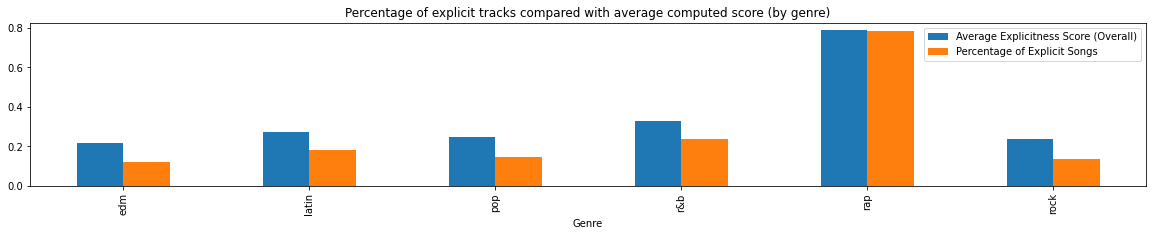

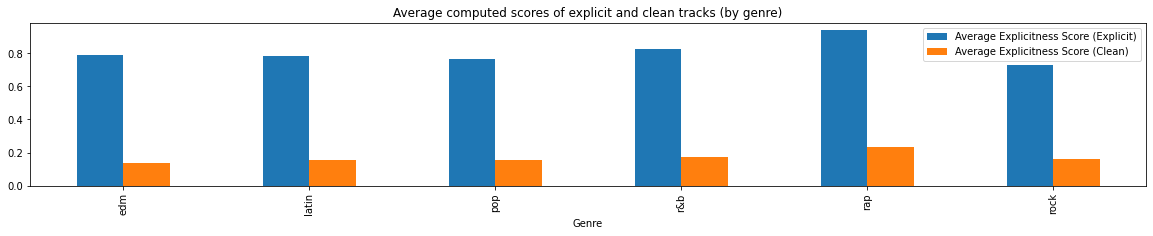

In [80]:
# plot the results
print(genre_df_T)
filtered_gt = genre_df_T[["Average Explicitness Score (Overall)","Percentage of Explicit Songs"]]
filtered_gt.plot(kind = "bar", figsize = (20,3), title = 'Percentage of explicit tracks compared with average computed score (by genre)')
filtered_gt_2 = genre_df_T[["Average Explicitness Score (Explicit)","Average Explicitness Score (Clean)"]]
filtered_gt_2.plot(kind = "bar", figsize = (20,3), title = 'Average computed scores of explicit and clean tracks (by genre)')

In [58]:
# perform an analysis of the tracks by subgenre
# create lists for a dataframe
sub_genres_avg_score = []
sub_genres_pctg_exp = []
sub_genres_avg_score_exp = []
sub_genres_avg_score_inexp = []
sub_genres = mega_df["playlist_subgenre"].unique().tolist()
sub_genres.sort()
# iterate through the subgenres to calculate average scores
for genre in sub_genres:
  sub_genres_avg_score.append(mega_df.loc[mega_df["playlist_subgenre"] == genre]["explicit_prob"].mean())
  sub_genres_pctg_exp.append(mega_df.loc[mega_df["playlist_subgenre"] == genre]["explicit_est"].mean())
  sub_genres_avg_score_exp.append(mega_df.loc[(mega_df["playlist_subgenre"] == genre) & (mega_df["explicit_est"] == 1)]["explicit_prob"].mean())
  sub_genres_avg_score_inexp.append(mega_df.loc[(mega_df["playlist_subgenre"] == genre) & (mega_df["explicit_est"] == 0)]["explicit_prob"].mean())

In [81]:
# convert lists into dataframe
sg_data = [sub_genres, sub_genres_avg_score,sub_genres_avg_score_exp,sub_genres_avg_score_inexp, sub_genres_pctg_exp]
sub_genre_df = pandas.DataFrame(sg_data, index = ["Subgenre", "Average Explicitness Score (Overall)", "Average Explicitness Score (Explicit)", "Average Explicitness Score (Clean)", "Percentage of Explicit Songs"])
subgenre_df = sub_genre_df.T
subgenre_df.set_index('Subgenre', inplace = True, drop = True)
print(subgenre_df)

                          Average Explicitness Score (Overall)  \
Subgenre                                                         
album rock                                            0.200301   
big room                                              0.232508   
classic rock                                          0.220321   
dance pop                                             0.231186   
electro house                                          0.21955   
electropop                                            0.253244   
gangster rap                                          0.887481   
hard rock                                             0.295386   
hip hop                                               0.812092   
hip pop                                               0.425384   
indie poptimism                                       0.219335   
latin hip hop                                         0.326334   
latin pop                                             0.283817   
neo soul  

<AxesSubplot:title={'center':'Average computed scores of explicit and clean tracks (by subgenre)'}, xlabel='Subgenre'>

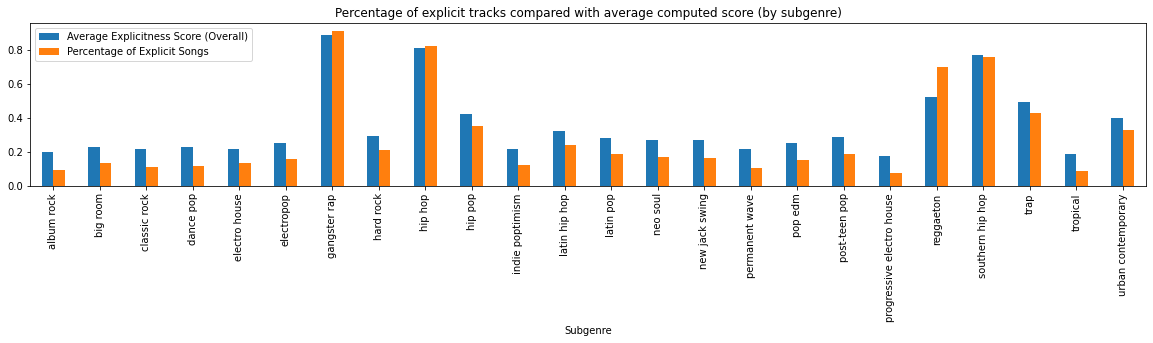

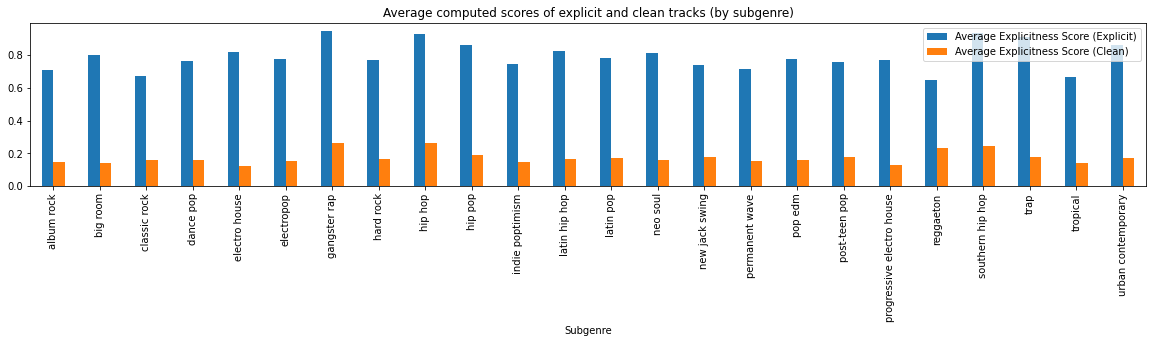

In [82]:
# plot the results
filtered_sg = subgenre_df[["Average Explicitness Score (Overall)","Percentage of Explicit Songs"]]
filtered_sg.plot(kind = "bar", figsize = (20,3), title = 'Percentage of explicit tracks compared with average computed score (by subgenre)')
filtered_sg_2 = subgenre_df[["Average Explicitness Score (Explicit)","Average Explicitness Score (Clean)"]]
filtered_sg_2.plot(kind = "bar", figsize = (20,3), title = 'Average computed scores of explicit and clean tracks (by subgenre)')

In [ ]:
# analyze the tracks by decade

In [61]:
# creating a new dataframe the only includes track release date and scores
mega_df_sorted = mega_df.sort_values(by = ['track_album_release_date'])
mega_df_sorted_filtered = mega_df[['track_album_release_date','explicit_prob', 'explicit_est']]
mega_df_sorted_filtered.to_csv("decades.csv")

In [62]:
# create lists for iteration and to create a datafram out of
decades = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
decades_song_counts = []
# I found it easier to break up the decades by index, rather than requiring python
# to search through and check the dates for every song, so I hard-coded these values in.
decades_indices = [0, 122, 829, 1709, 3288, 5814, 15210, 15406]
decades_avg_prob = []
decades_avg_prob_exp = []
decades_avg_prob_inexp = []
decades_pctg_exp = []

In [63]:
# for each song in the given range (i.e. decade), calculate the average scores
for i in range(0, 7):
  decades_song_counts.append(decades_indices[i+1]-decades_indices[i])
  decades_avg_prob.append(mega_df_sorted_filtered.iloc[decades_indices[i]:decades_indices[i+1]]["explicit_prob"].mean())
  decades_avg_prob_exp.append(mega_df_sorted_filtered.iloc[decades_indices[i]:decades_indices[i+1]].loc[mega_df["explicit_est"] == 1]["explicit_prob"].mean())
  decades_avg_prob_inexp.append(mega_df_sorted_filtered.iloc[decades_indices[i]:decades_indices[i+1]].loc[mega_df["explicit_est"] == 0]["explicit_prob"].mean())
  decades_pctg_exp.append(mega_df_sorted_filtered.iloc[decades_indices[i]:decades_indices[i+1]]["explicit_est"].mean())

In [83]:
# convert the lists into a dataframe
decade_data = [decades, decades_avg_prob, decades_avg_prob_exp, decades_avg_prob_inexp, decades_pctg_exp]
decade_df = pandas.DataFrame(decade_data, index = ["Decade", "Average Explicitness Score (Overall)", "Average Explicitness Score (Explicit)", "Average Explicitness Score (Clean)", "Percentage of Explicit Songs"])
decade_df_T = decade_df.T
decade_df_T.set_index('Decade', inplace = True, drop = True)

<AxesSubplot:title={'center':'Average computed scores of explicit and clean tracks (by decade)'}, xlabel='Decade'>

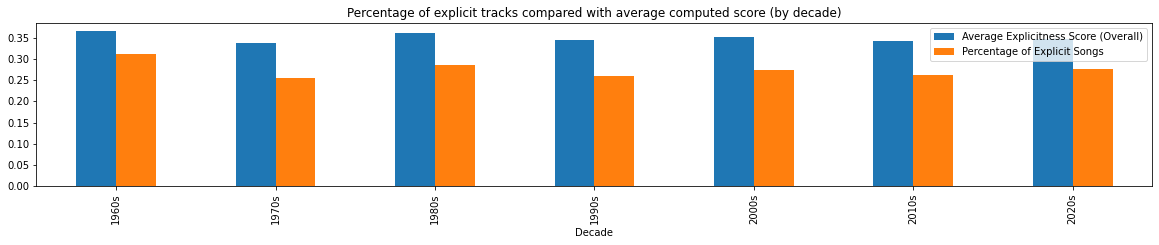

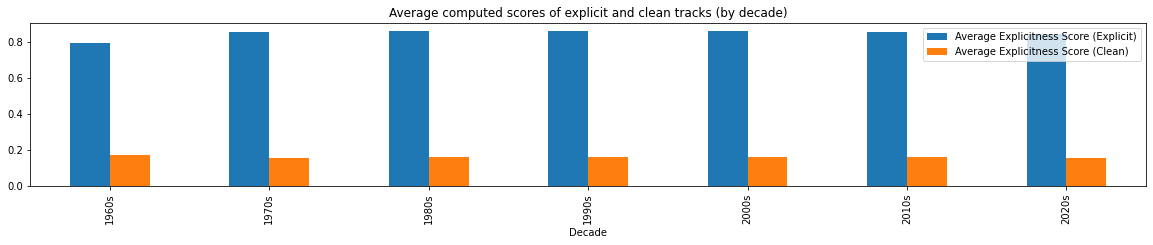

In [84]:
# plot the results
filtered_dt = decade_df_T[["Average Explicitness Score (Overall)","Percentage of Explicit Songs"]]
filtered_dt.plot(kind = "bar", figsize = (20,3), title = 'Percentage of explicit tracks compared with average computed score (by decade)')
filtered_dt_2 = decade_df_T[["Average Explicitness Score (Explicit)","Average Explicitness Score (Clean)"]]
filtered_dt_2.plot(kind = "bar", figsize = (20,3), title = 'Average computed scores of explicit and clean tracks (by decade)')